# Lab 5 DAVE3625

In [2]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans2, whiten
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mapboxgl.viz import *
from mapboxgl.utils import *
from coloraide import Color
#import station

df = pd.read_csv('https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab5/data/seeds_dataset.txt', sep="\t")
df.head()

,area,perimeter,compactness,length,with,asymmetry,groove,result
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,area,perimeter,compactness,length,with,asymmetry,groove,result
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
with,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
result,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [4]:
result = df["result"]
df.drop(columns="result", inplace=True)
df.head()

x = np.array(df)
clusters = 3

kmeans = KMeans(n_clusters=clusters,  random_state=0, max_iter=300).fit(x)
cluster = kmeans.labels_

df["y"]=cluster
df.head()

/home/jpwiig/anaconda3/envs/dave3625/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,area,perimeter,compactness,length,with,asymmetry,groove,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


/home/jpwiig/anaconda3/envs/dave3625/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


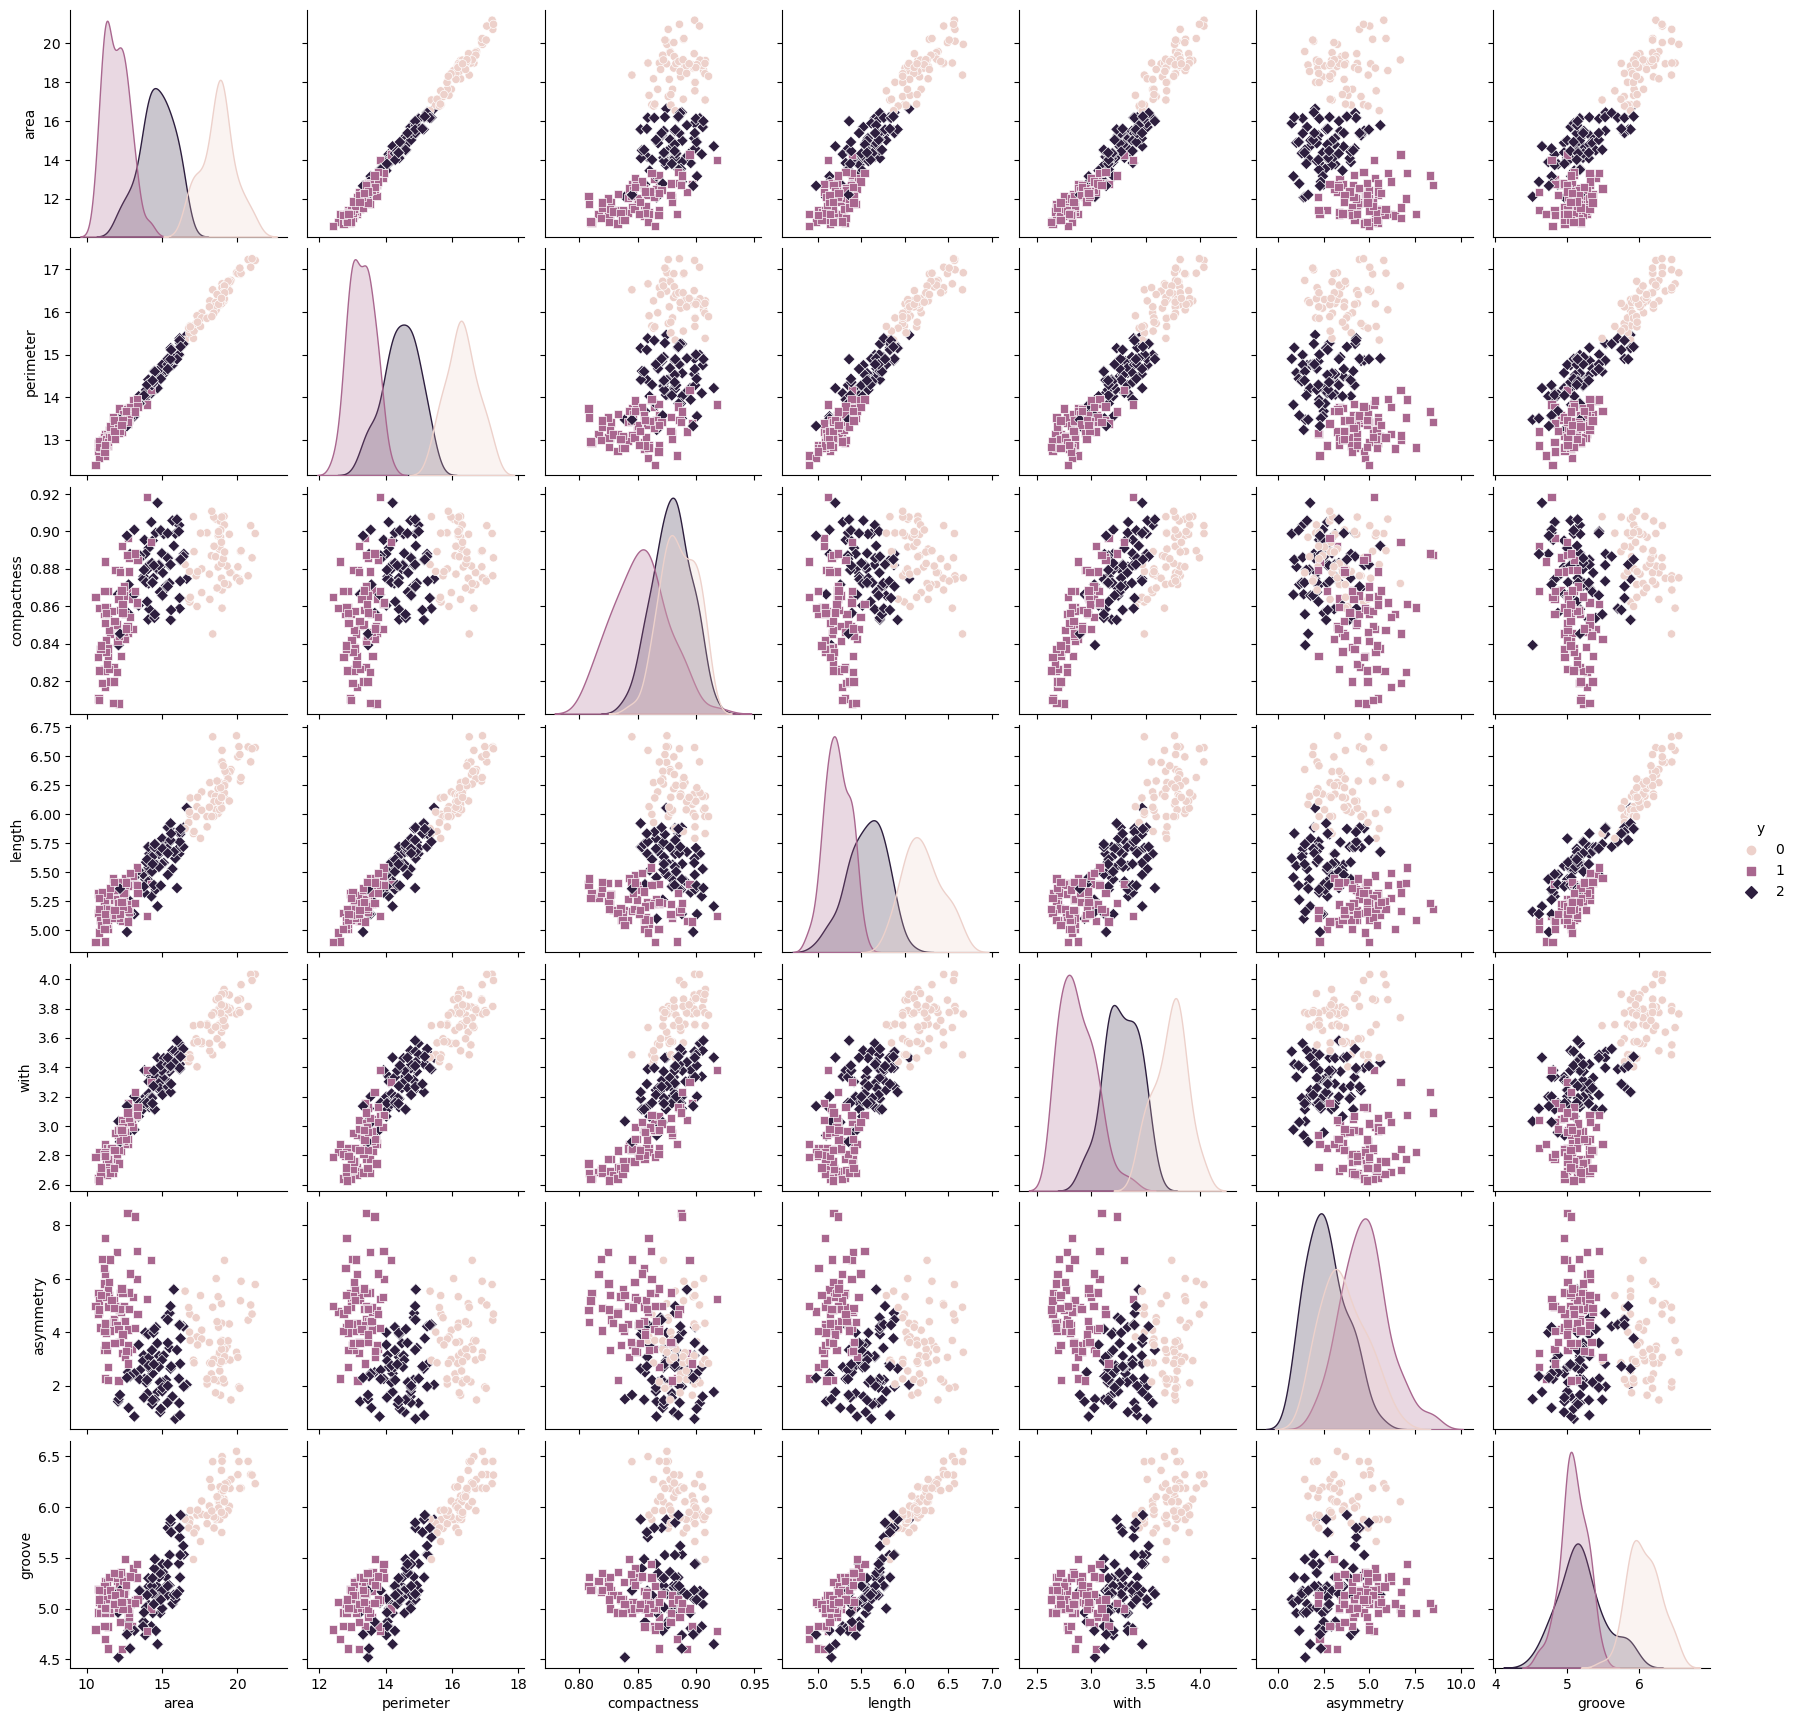

In [5]:

sns.pairplot(df, vars=df.columns[:-1], hue ="y", markers=["o", "s", "D"])

/home/jpwiig/anaconda3/envs/dave3625/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


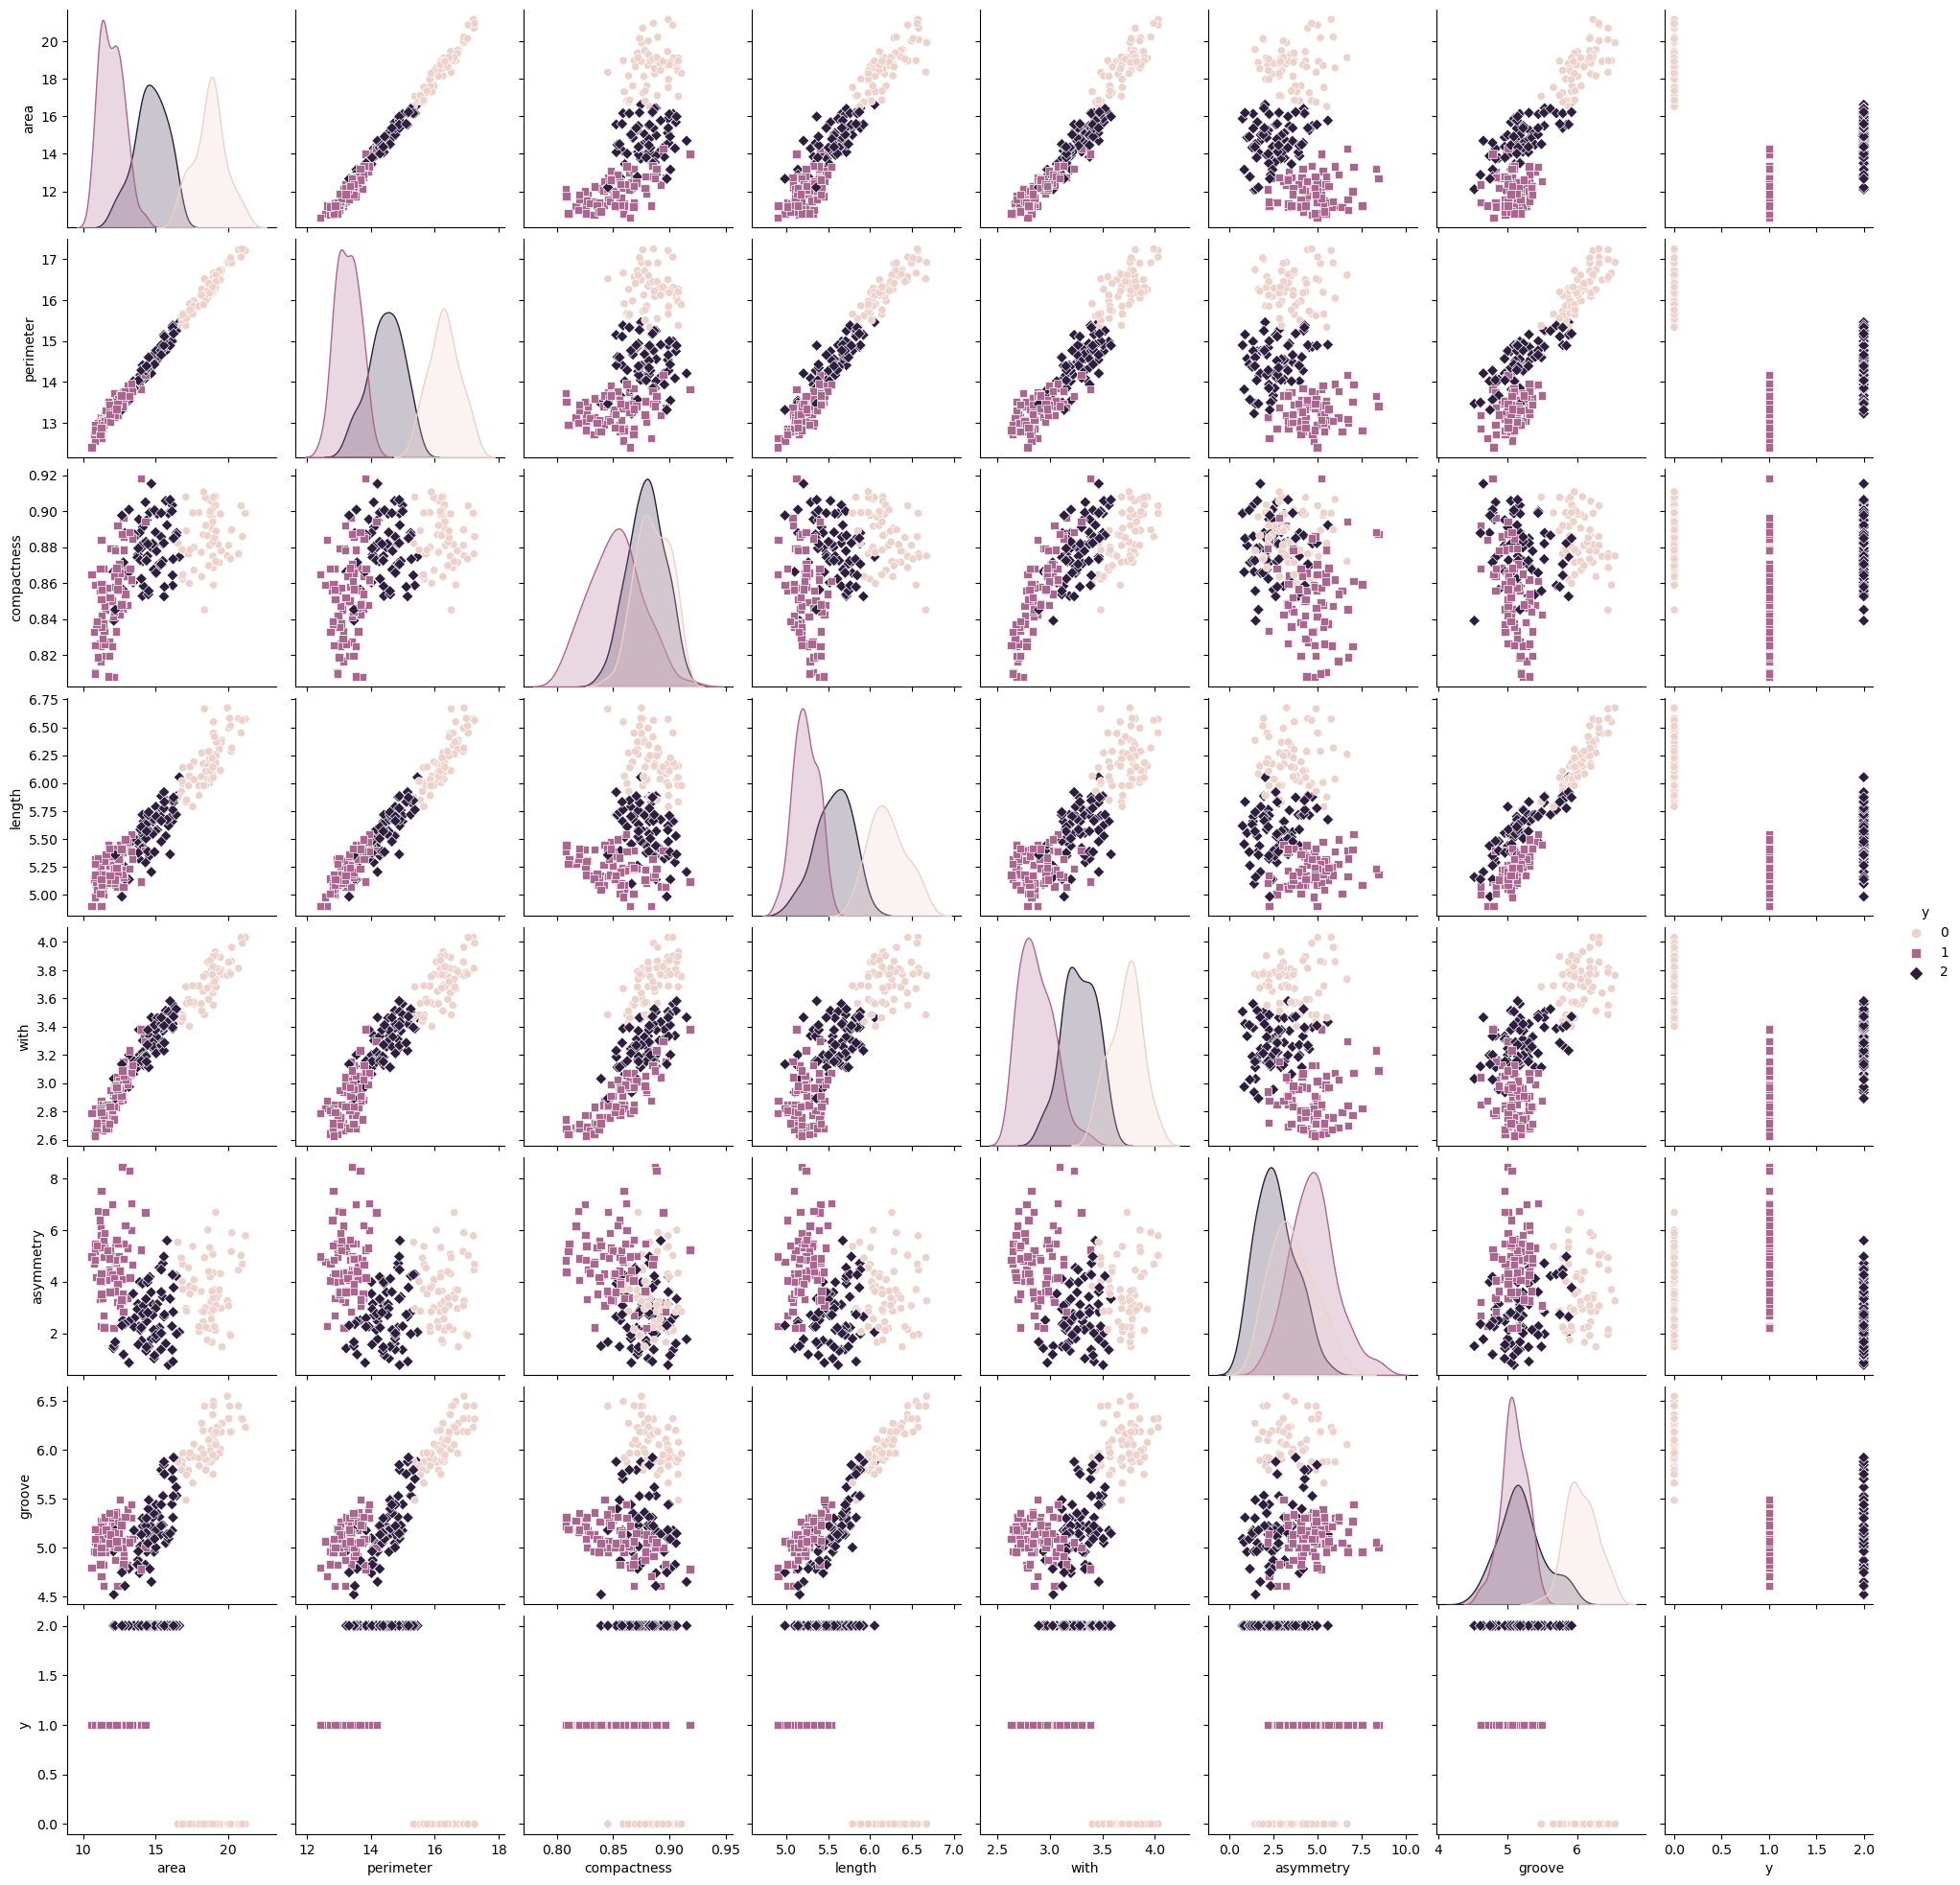

In [6]:
df["result"]=result
sns.pairplot(df, vars=df.columns[:-1], hue ="y", markers=["o","s","D"])

# Bysykkel

In [7]:
year ="2021"
month = "10"

URL = f"https://data.urbansharing.com/oslobysykkel.no/trips/v1/{year}/{month}.csv"
dfcycles = pd.read_csv(URL)
dfcycles.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2021-10-01 03:03:09.586000+00:00,2021-10-01 03:08:19.084000+00:00,309,397,Storo Storsenter,langs Vitaminveien,59.946710,10.773805,393,Hans Nielsen Hauges plass,langs Hans Nielsen Hauges gate,59.939244,10.774319
1,2021-10-01 03:03:42.698000+00:00,2021-10-01 03:12:51.917000+00:00,549,583,Galgeberg,langs St. Halvards gate,59.907076,10.779164,585,Nordre gate,ved Grünerbrua,59.921150,10.754714
2,2021-10-01 03:07:18.929000+00:00,2021-10-01 03:16:44.444000+00:00,565,514,Sofienberggata,ved Sars gate,59.921206,10.769989,442,Vulkan,ved Maridalsveien,59.922510,10.751010
3,2021-10-01 03:07:43.339000+00:00,2021-10-01 03:18:25.719000+00:00,642,444,AHO,langs Maridalsveien,59.925265,10.750462,558,Dokkveien,ved Støperigata,59.910974,10.727700
4,2021-10-01 03:08:45.961000+00:00,2021-10-01 03:18:15.293000+00:00,569,446,Bislett Stadion,ved rundkjøringen,59.925471,10.731219,478,Jernbanetorget,Europarådets plass,59.911901,10.749929


In [8]:
dfcycles = dfcycles.sort_values('start_station_id',ascending=False)
sdfcycles = dfcycles.drop_duplicates(subset='start_station_name', keep='first')
sdfcycles =sdfcycles.sort_values('start_station_name', ascending=True)
sdfcycles.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
24156,2021-10-06 18:52:56.340000+00:00,2021-10-06 18:56:29.311000+00:00,212,623,7 Juni Plassen,langs Henrik Ibsens gate,59.915060,10.731272,748,Hydroparken,langs Drammensveien,59.914145,10.715505
35133,2021-10-09 09:49:22.496000+00:00,2021-10-09 09:59:11.626000+00:00,589,444,AHO,langs Maridalsveien,59.925265,10.750462,599,Paléhaven,langs Strandgata,59.910331,10.750110
37818,2021-10-09 17:55:19.843000+00:00,2021-10-09 18:02:37.514000+00:00,437,425,Adamstuen,ved trikkestoppen,59.932792,10.734457,410,Landstads gate,langs Uelands gate,59.929005,10.749676
35119,2021-10-09 09:47:56.276000+00:00,2021-10-09 09:56:08.178000+00:00,491,1755,Aker Brygge,ved trikkestopp,59.911184,10.730035,537,St. Olavs gate,ved Pilestredet,59.917968,10.738629
74104,2021-10-16 22:22:37.547000+00:00,2021-10-16 22:28:34.157000+00:00,356,557,Akersgata,ved Grensen,59.914197,10.742883,495,Vaterlandsparken,langs Brugata,59.913516,10.757335


In [9]:
class station:
    def __init__(self, id,longitude,latitude,name, change = 0, zone = 0):
        self.id = id
        self.long = longitude
        self.lat = latitude
        self.name = name
        self.change = change
        self.zone = zone
    
    def updateChange(self, tick):
        self.change += tick
    def setZone(self, zone):
        self.zone = zone
    def getZone(self):
        return self.zone        
    def getId(self):
        return self.id
    def getName(self):
        return self.name
    def getLongLat(self):
        return [self.long,self.lat]
    def getChange(self):
        return self.change
    def export(self):
        return [self.id,self.name,self.long,self.lat,self.change,self.zone]

In [10]:
listofstat =[]
for index, row in sdfcycles.iterrows():
    tmp = station(row[3], row[6], row[7], row[4])
    listofstat.append(tmp)

clusters = 4

cor=[]

for station in listofstat: 
    cor.append(station.getLongLat())
coordiates = np.array(cor)

kmeans = KMeans(n_clusters=clusters, random_state=0, max_iter=150).fit(coordiates)

x,clust1 =kmeans2(whiten(coordiates), clusters, iter=150)
clust2=kmeans.labels_

clust2=kmeans.labels_


/home/jpwiig/anaconda3/envs/dave3625/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


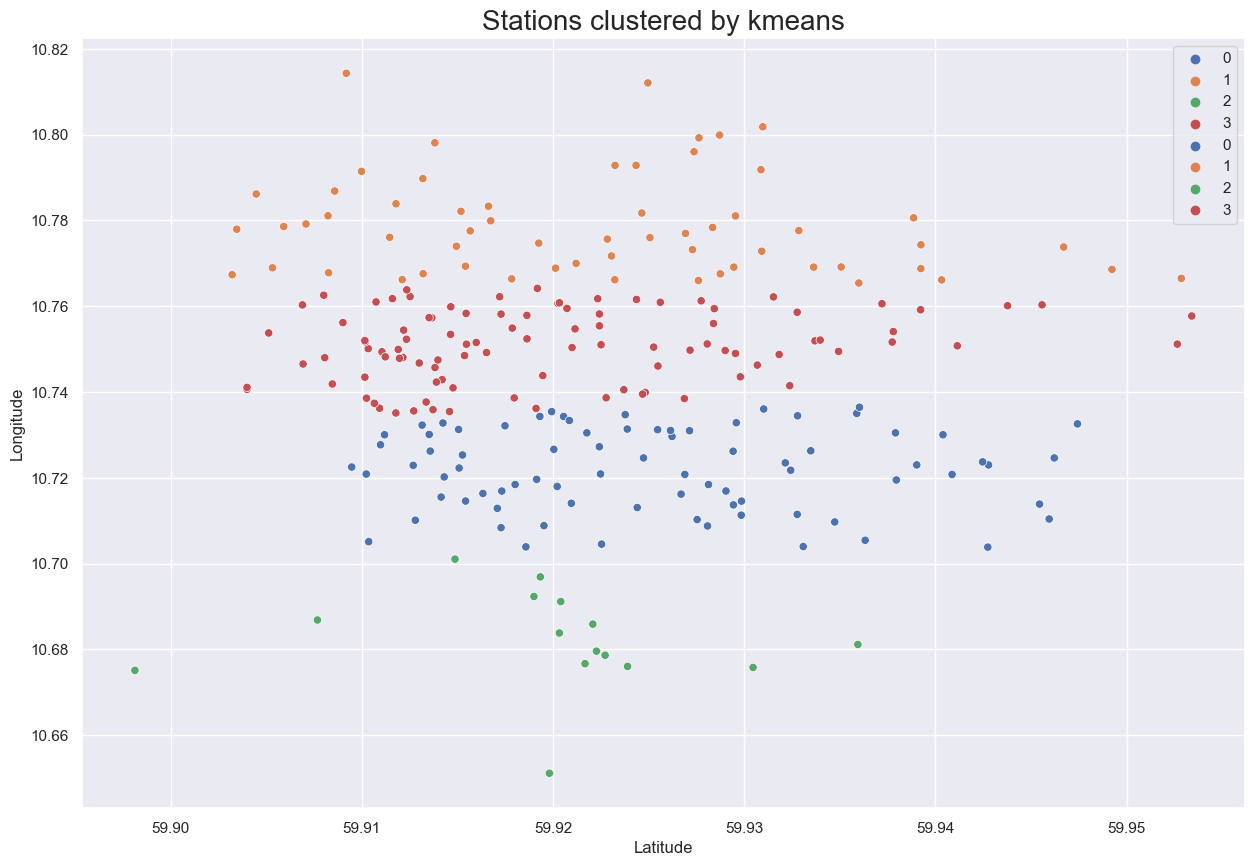

In [11]:
def plot_cluster(cluster):
    sns.set(rc={'figure.figsize':(15,10)})
    sns.scatterplot(data=coordiates, x=coordiates[:,0], y=coordiates[:,1], hue=cluster, palette="deep")
    plt.title("Stations clustered by kmeans", fontsize=20)
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel('Longitude', fontsize=12)

plot_cluster(clust1)
plot_cluster(clust2)

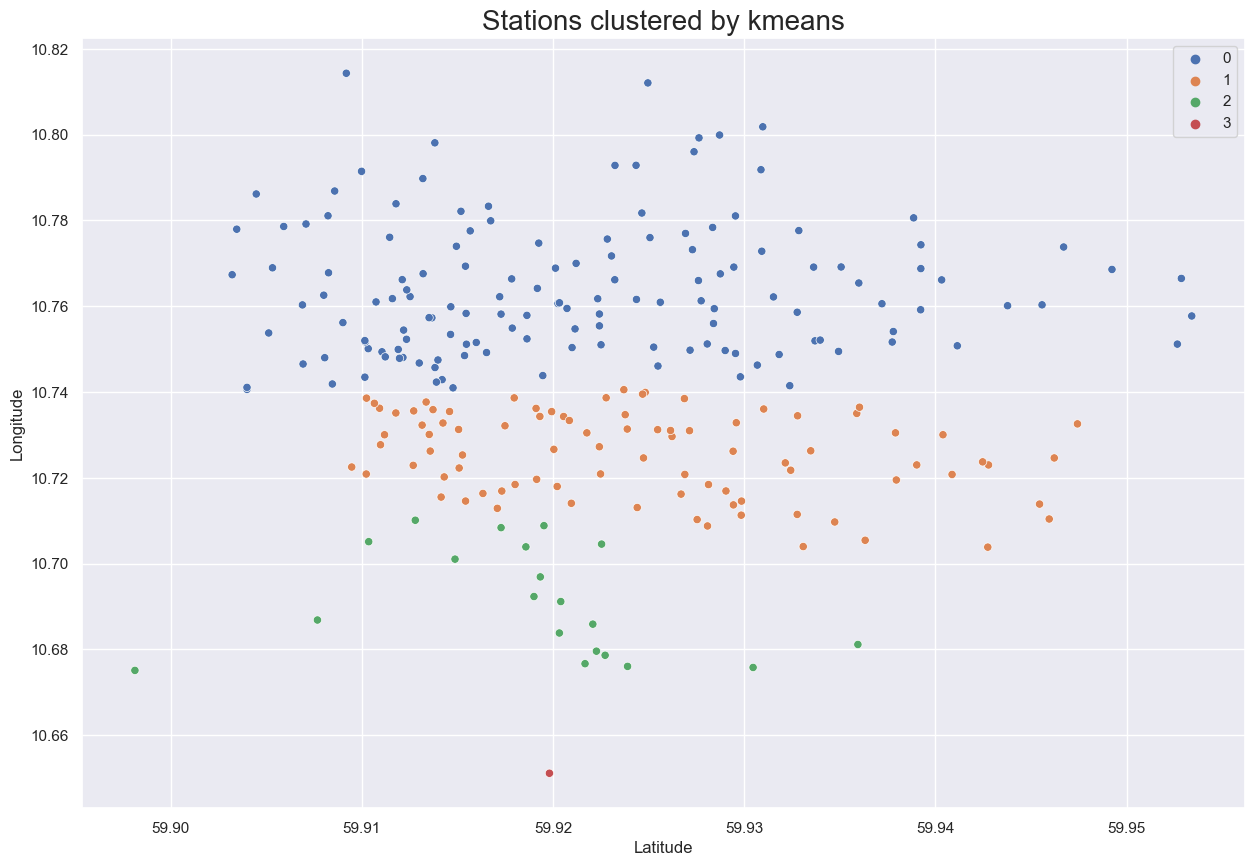

In [12]:
from sklearn.cluster import AgglomerativeClustering
newAlg = AgglomerativeClustering(linkage='average', n_clusters=clusters)
newAlg.fit(coordiates)
clust3 =newAlg.labels_

plot_cluster(clust3)

In [13]:


#token = ""

clust = clust1
for i in range(len(listofstat)):     
    listofstat[i].setZone(clust[i]+1)
newDFCyc = pd.DataFrame(columns= ["Id", "Name", "Longitude", "Latitude", "Change", "Zone"])
for s in listofstat: 
    series = pd.Series(s.export(), index = newDFCyc.columns)
    newDFCyc = newDFCyc.append(series, ignore_index = True)
df_to_geojson(newDFCyc, filename='points.geojson', properties=['Id', 'Name', 'Change', 'Zone'],lon='Latitude', lat='longitude', precision=3)

geofile = 'points.geojson'

nrClust = clust.max()+1

color_stops = Color("red").steps(["yellow","purple","green","blue"], steps = nrClust)
c = ([x.to_string() for x in color_stops])
l=[]
for i in range(nrClust):
    c[i]=c[i].replace(" ", ",")
    l.append([i+1,c[i]])

center = (10.77837, 59.928349)
zoom = 10
viz = CircleViz(geofile, access_token = , height = '500px',radius=3, color_property="Zone", color_stops=l, center = center, zoom = zoom, below_layer = 'waterway-label')
viz.show(True)



SyntaxError: invalid syntax (571385327.py, line 25)